In [1]:
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from collections import Counter
from tqdm.notebook import tqdm

In [2]:
ann_path = '../data/COIN.json'

In [25]:
with open(ann_path, 'r') as f:
    ann = json.load(f)
print(type(ann))

<class 'dict'>


In [26]:
print(ann.keys())
db = ann['database']
print(len(db.keys()))
row = db[list(db.keys())[0]]
for k, v in row.items():
    print(f'{k}: {v}')

dict_keys(['database'])
11827
recipe_type: 122
annotation: [{'id': '325', 'segment': [25.0, 30.0], 'label': 'pull up the hair to reserve place for the hair extensions'}, {'id': '326', 'segment': [31.0, 49.0], 'label': 'put on the hair extensions'}, {'id': '327', 'segment': [107.0, 117.0], 'label': 'put down the hair and comb'}]
video_url: https://www.youtube.com/embed/xZecGPPhbHE
start: 19.621378525393986
end: 134.36378671172514
duration: 185.085
class: PutOnHairExtensions
subset: testing


In [27]:
classes = [row['class'] for _, row in db.items()]
cnt_cls = Counter(classes)
recipes = [row['recipe_type'] for _, row in db.items()]
cnt_rec = Counter(recipes)

In [28]:
print(len(cnt_cls))
print(len(cnt_rec))

180
180


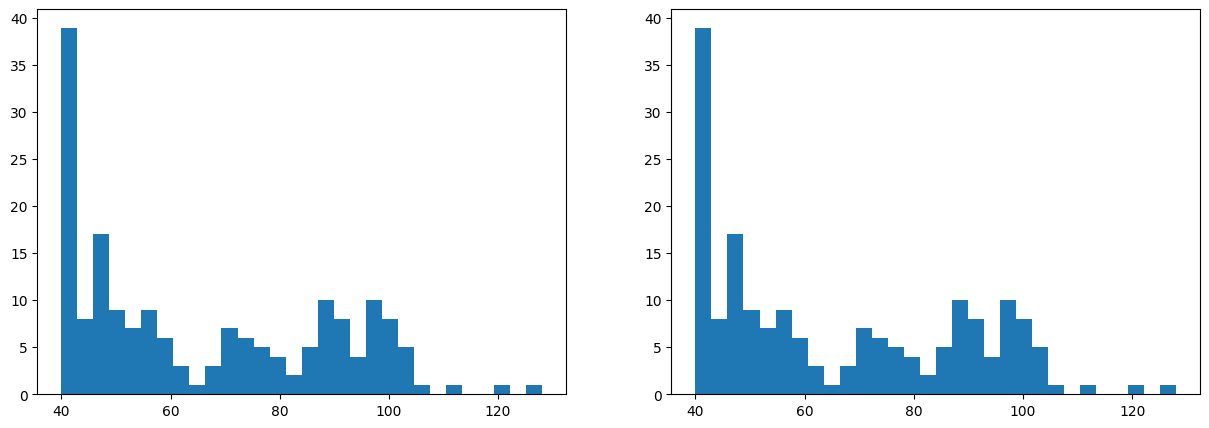

In [29]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(15, 5))
ax0.hist(cnt_cls.values(), 30)
ax1.hist(cnt_cls.values(), 30)
fig.show()

In [30]:
def build_df(db):
    data = {
        'id': [],
        'cls_name': [],
        'cls': [],
        'subset': [],
        'url': []
    }
    for key, record in tqdm(db.items()):
        data['id'] += [key]
        data['cls_name'] += [record['class']]
        data['cls'] += [record['recipe_type']]
        data['subset'] += [record['subset']]
        data['url'] += [record['video_url']]
    return pd.DataFrame(data)

In [31]:
res_df = build_df(db)
print(len(res_df))
res_df.head()
res_df.to_csv('../data/COIN.csv', index=False)

  0%|          | 0/11827 [00:00<?, ?it/s]

11827


In [21]:
def conv(item):
    return np.array(list(map(float, item[1:-1].split())))

np.set_printoptions(threshold=1200)

In [27]:
edf_pth = '../data/aggl.csv'
edf = pd.read_csv(edf_pth, converters={'emb': conv})
# edf = pd.read_csv(edf_pth)
print(len(edf))
edf.head(2)

9993


,id,emb
0,gasbk4o89-M,"[-1.2953628, -6.4995999, -1.3864385, 2.298152,..."
1,wDLKxXpF_sE,"[-2.4036715, -5.92186832, 6.61787796, 0.386046..."


In [23]:
print(edf.loc[0, 'emb'].shape)

(1024,)


In [24]:
coin_pth = '../data/COIN.csv'
df = pd.read_csv(coin_pth)
print(len(df))
df.head(2)

11827


,id,cls_name,cls,subset,url
0,xZecGPPhbHE,PutOnHairExtensions,122,testing,https://www.youtube.com/embed/xZecGPPhbHE
1,NLy71UrHElw,PractisePoleVault,116,training,https://www.youtube.com/embed/NLy71UrHElw


In [28]:
res_path = '../data/COINaggl.csv'
res_df = df.set_index('id').join(edf.set_index('id'), how='inner')
print(len(res_df))
res_df.head(2)

9993


,cls_name,cls,subset,url,emb
id,,,,,
xZecGPPhbHE,PutOnHairExtensions,122,testing,https://www.youtube.com/embed/xZecGPPhbHE,"[-1.64960563, -1.18387651, 1.86178029, -1.8617..."
NLy71UrHElw,PractisePoleVault,116,training,https://www.youtube.com/embed/NLy71UrHElw,"[-0.91899359, -4.3114042, -7.8977823, -0.84243..."


In [29]:
res_df.reset_index(inplace=True)
res_df.to_csv(res_path, index=False)
res_df.head(2)

,id,cls_name,cls,subset,url,emb
0,xZecGPPhbHE,PutOnHairExtensions,122,testing,https://www.youtube.com/embed/xZecGPPhbHE,"[-1.64960563, -1.18387651, 1.86178029, -1.8617..."
1,NLy71UrHElw,PractisePoleVault,116,training,https://www.youtube.com/embed/NLy71UrHElw,"[-0.91899359, -4.3114042, -7.8977823, -0.84243..."


In [33]:
filename = 'COINnoaggl.csv'
df_pth = f'../data/{filename}'
test_pth = f'../data/test/{filename}'
train_pth = f'../data/train/{filename}'
df = pd.read_csv(df_pth)
print(len(df))

9993


In [34]:
df_test = df[df['subset'] == 'testing']
df_train = df[df['subset'] == 'training']
print(len(df_test), len(df_train), len(df_test) / len(df))

2351 7642 0.2352646852796958


In [35]:
df_test.to_csv(test_pth, index=False)
df_train.to_csv(train_pth, index=False)

In [20]:
df_test = pd.read_csv(test_pth)
df_train = pd.read_csv(train_pth)

In [9]:
cnt_test = Counter(df_test['cls'])
cnt_train = Counter(df_train['cls'])
lte = len(df_test)
ltr = len(df_train)

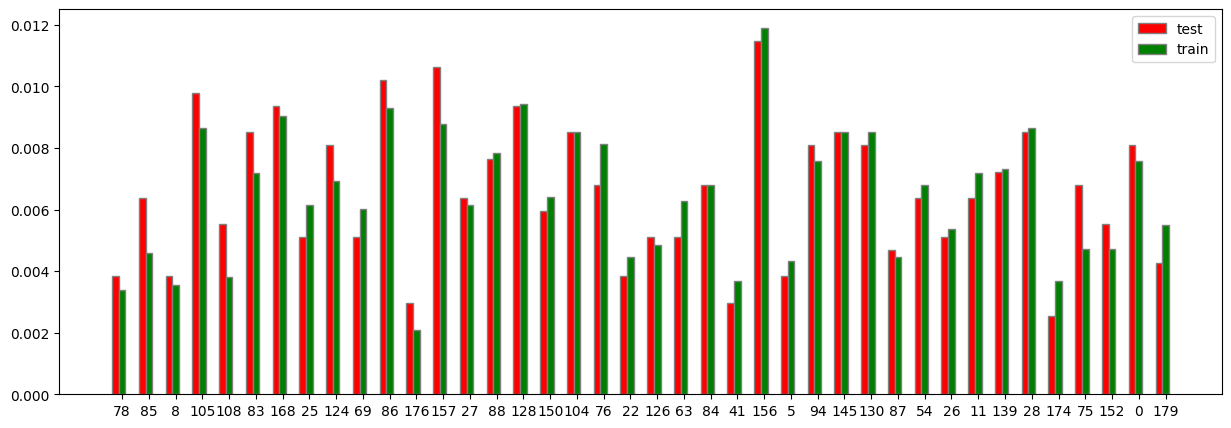

In [11]:
barWidth = 0.25
fig = plt.subplots(figsize =(15, 5))
 
# set height of bar
keys = list(cnt_test.keys())[30:70]
_test, _train = [], []
for k in keys:
    _test.append(cnt_test[k] / lte)
    _train.append(cnt_train[k] / ltr)
 
# Set position of bar on X axis
br1 = np.arange(len(keys))
br2 = [x + barWidth for x in br1]
 
# Make the plot
plt.bar(br1, _test, color ='r', width = barWidth,
        edgecolor ='grey', label ='test')
plt.bar(br2, _train, color ='g', width = barWidth,
        edgecolor ='grey', label ='train')
 
# Adding Xticks
plt.xticks([r + barWidth for r in range(len(keys))],
           keys)
 
plt.legend()
plt.show()